<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 180.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 203.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 124.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 129.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 144.4 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here
df.isnull().sum()

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

In [4]:
df[['Employment','JobSat','RemoteWork']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Employment  65437 non-null  object 
 1   JobSat      29126 non-null  float64
 2   RemoteWork  54806 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.5+ MB


In [5]:
df[['Employment', 'JobSat', 'RemoteWork']].describe(include='all')

,Employment,JobSat,RemoteWork
count,65437,29126.000000,54806
unique,110,NaN,3
top,"Employed, full-time",NaN,"Hybrid (some remote, some in-person)"
freq,39041,NaN,23015
mean,NaN,6.935041,NaN
std,NaN,2.088259,NaN
min,NaN,0.000000,NaN
25%,NaN,6.000000,NaN
50%,NaN,7.000000,NaN
75%,NaN,8.000000,NaN


In [6]:
df['JobSat'].fillna(df['JobSat'].mean(), inplace = True)

/tmp/ipykernel_391/1864590766.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JobSat'].fillna(df['JobSat'].mean(), inplace = True)


In [7]:
df['RemoteWork'].ffill(inplace = True)

/tmp/ipykernel_391/1329198080.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].ffill(inplace = True)


In [8]:
df[['Employment', 'JobSat', 'RemoteWork']].describe(include='all')

,Employment,JobSat,RemoteWork
count,65437,65437.000000,65437
unique,110,NaN,3
top,"Employed, full-time",NaN,"Hybrid (some remote, some in-person)"
freq,39041,NaN,27398
mean,NaN,6.935041,NaN
std,NaN,1.393186,NaN
min,NaN,0.000000,NaN
25%,NaN,6.935041,NaN
50%,NaN,6.935041,NaN
75%,NaN,7.000000,NaN


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [9]:
## Write your code here
df['YearsCodePro'].describe()

count     51610
unique       52
top           2
freq       4168
Name: YearsCodePro, dtype: object

In [10]:
df['YearsCodePro'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 65437 entries, 0 to 65436
Series name: YearsCodePro
Non-Null Count  Dtype 
--------------  ----- 
51610 non-null  object
dtypes: object(1)
memory usage: 511.4+ KB


In [11]:
df['YearsCodePro'].unique()

array([nan, '17', '27', '7', '11', '25', '12', '10', '3',
       'Less than 1 year', '18', '37', '15', '20', '6', '2', '16', '8',
       '14', '4', '45', '1', '24', '29', '5', '30', '26', '9', '33', '13',
       '35', '23', '22', '31', '19', '21', '28', '34', '32', '40', '50',
       '39', '44', '42', '41', '36', '38', 'More than 50 years', '43',
       '47', '48', '46', '49'], dtype=object)

In [12]:
def clean_years(value):
    if pd.isna(value):
        return np.nan 
    value_str = str(value).strip()
    if value_str == 'Less than 1 year':
        return 0.5
    elif value_str == 'More than 50 years':
        return 51 
    else:
        try:
            return float(value) 
        except ValueError:
            return np.nan

In [13]:
!pip install numpy 
import numpy as np 

In [14]:
df['YearsCodePro'] = df['YearsCodePro'].apply(clean_years)

In [15]:
df['YearsCodePro'].unique()

array([ nan, 17. , 27. ,  7. , 11. , 25. , 12. , 10. ,  3. ,  0.5, 18. ,
       37. , 15. , 20. ,  6. ,  2. , 16. ,  8. , 14. ,  4. , 45. ,  1. ,
       24. , 29. ,  5. , 30. , 26. ,  9. , 33. , 13. , 35. , 23. , 22. ,
       31. , 19. , 21. , 28. , 34. , 32. , 40. , 50. , 39. , 44. , 42. ,
       41. , 36. , 38. , 51. , 43. , 47. , 48. , 46. , 49. ])

In [16]:
df['YearsCodePro'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 65437 entries, 0 to 65436
Series name: YearsCodePro
Non-Null Count  Dtype  
--------------  -----  
51610 non-null  float64
dtypes: float64(1)
memory usage: 511.4 KB


In [17]:
bins = [0, 5, 10, 20, np.inf] # np.inf ensures all values > 20 are included in the last bin
labels = ['0-5 years', '5-10 years', '10-20 years', '>20 years']
df['ExperienceLevel'] = pd.cut(df['YearsCodePro'], bins = bins, labels = labels, 
                               right = False, # This creates intervals like [0, 5) and [5, 10), meaning '5' years goes into the '5-10 years' bin.
                               include_lowest = True, # Ensures the lowest value (0 or 0.5) is included in the first bin.
                               ordered = True) #Ensures the categories have a meaningful order (Junior to Senior)
print(df[['YearsCodePro', 'ExperienceLevel']].head())

   YearsCodePro ExperienceLevel
0           NaN             NaN
1          17.0     10-20 years
2          27.0       >20 years
3           NaN             NaN
4           NaN             NaN


In [18]:
median_sat = df.groupby('ExperienceLevel')['JobSat'].median().reset_index()
median_sat

/tmp/ipykernel_391/306064566.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_sat = df.groupby('ExperienceLevel')['JobSat'].median().reset_index()


,ExperienceLevel,JobSat
0,0-5 years,6.935041
1,5-10 years,6.935041
2,10-20 years,6.935041
3,>20 years,6.935041


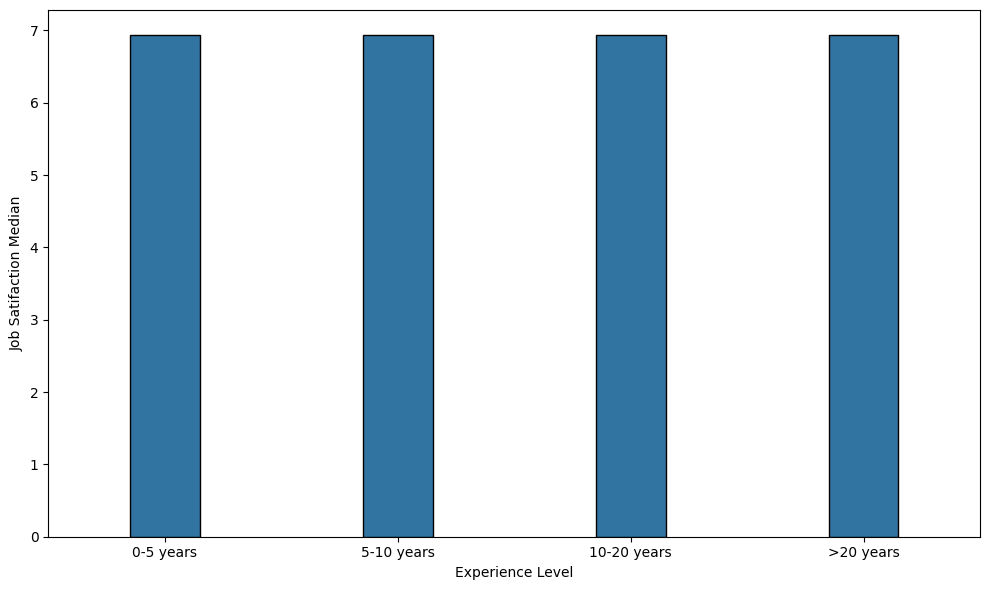

In [30]:
plt.figure(figsize = (10,6)) 
sns.barplot(x = 'ExperienceLevel', y = 'JobSat', data = median_sat, width = 0.3,
            edgecolor ='black') 
plt.xlabel('Experience Level')
plt.ylabel('Job Satifaction Median') 
plt.tight_layout()
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


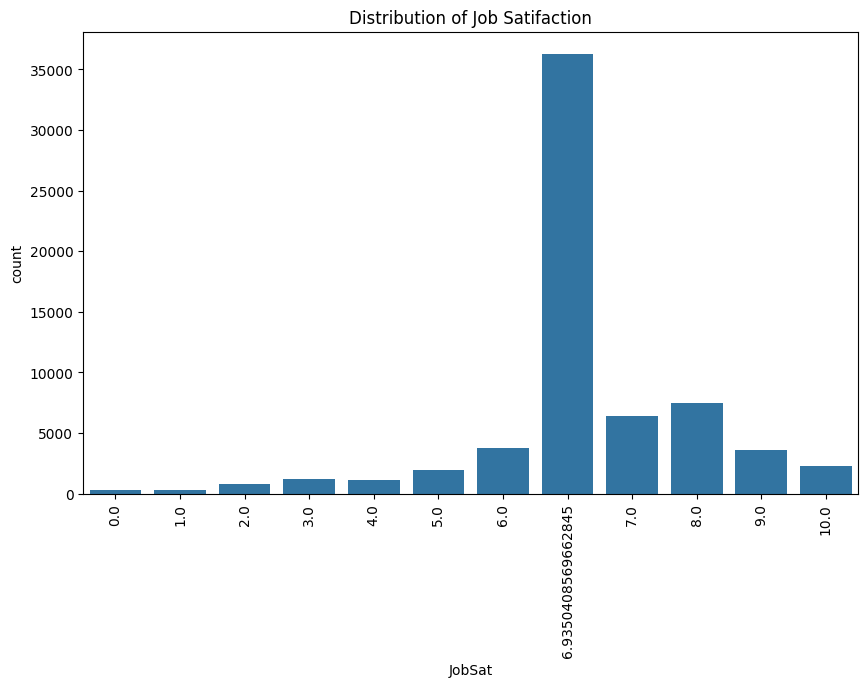

In [33]:
## Write your code here
plt.figure(figsize = (10,6))
sns.countplot(data = df, x= 'JobSat')
plt.title('Distribution of Job Satifaction') 
plt.xticks(rotation= 90)
plt.show()


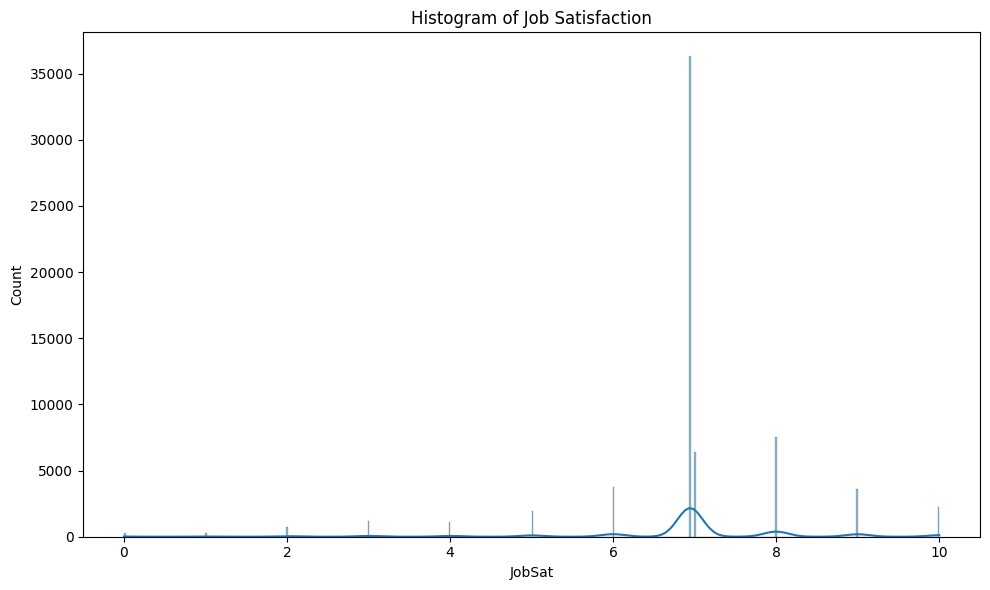

In [36]:
plt.figure(figsize = (10,6))
sns.histplot(data = df, x= 'JobSat', edgecolor = 'black', kde = True) 
plt.title('Histogram of Job Satisfaction')
plt.tight_layout()
plt.show()

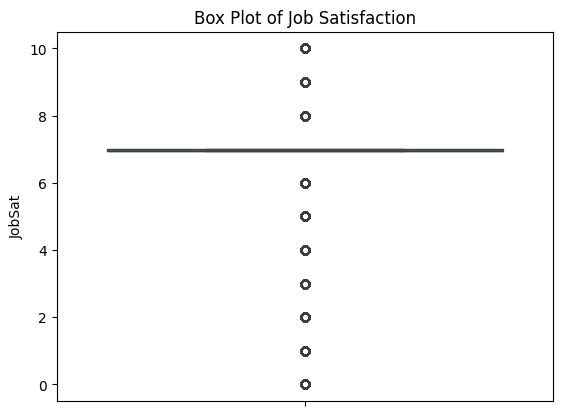

In [37]:
sns.boxplot(data = df, y='JobSat')
plt.title('Box Plot of Job Satisfaction')
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


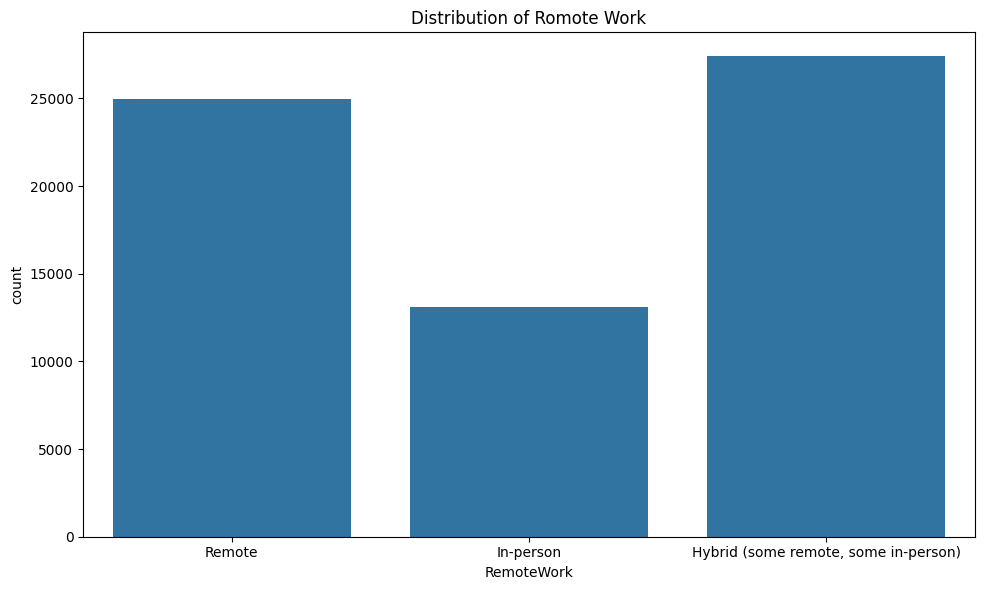

In [41]:
## Write your code here
plt.figure(figsize = (10,6)) 
sns.countplot(data = df, x = 'RemoteWork')
plt.title('Distribution of Romote Work')
plt.tight_layout() 
plt.show()

In [43]:
cross_tab_count = pd.crosstab(index = df['Employment'], columns= df['RemoteWork'], margins = True)
cross_tab_count

RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote,All
Employment,,,,
"Employed, full-time",17287,8556,13198,39041
"Employed, full-time;Employed, part-time",85,32,95,212
"Employed, full-time;Independent contractor, freelancer, or self-employed",1330,366,1861,3557
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time",80,17,87,184
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired",0,1,0,1
...,...,...,...,...
"Student, full-time;Student, part-time;Retired",1,0,1,2
"Student, part-time",211,114,169,494
"Student, part-time;Employed, part-time",282,179,97,558


In [45]:
cross_tab_count.sort_values(by = 'Remote', ascending= False).head(10)

RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote,All
Employment,,,,
All,27398,13095,24944,65437
"Employed, full-time",17287,8556,13198,39041
"Independent contractor, freelancer, or self-employed",1299,314,3233,4846
"Employed, full-time;Independent contractor, freelancer, or self-employed",1330,366,1861,3557
"Student, full-time",1970,936,1803,4709
"Not employed, but looking for work",962,462,917,2341
"Employed, part-time",575,330,361,1266
"Student, full-time;Not employed, but looking for work",260,151,275,686
"Not employed, but looking for work;Independent contractor, freelancer, or self-employed",92,25,266,383


In [47]:
cross_tab_countpct = pd.crosstab(index = df['Employment'], 
                                 columns= df['RemoteWork'], 
                                 normalize= 'index').mul(100).round(2) 
cross_tab_countpct

RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote
Employment,,,
"Employed, full-time",44.28,21.92,33.81
"Employed, full-time;Employed, part-time",40.09,15.09,44.81
"Employed, full-time;Independent contractor, freelancer, or self-employed",37.39,10.29,52.32
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time",43.48,9.24,47.28
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired",0.00,100.00,0.00
...,...,...,...
"Student, full-time;Student, part-time;Employed, part-time",57.14,14.29,28.57
"Student, full-time;Student, part-time;Retired",50.00,0.00,50.00
"Student, part-time",42.71,23.08,34.21


In [48]:
cross_tab_pctall = pd.crosstab(index = df['Employment'], 
                               columns = df['RemoteWork'], 
                               normalize = 'all').mul(100).round(2) 
cross_tab_pctall 

RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote
Employment,,,
"Employed, full-time",26.42,13.08,20.17
"Employed, full-time;Employed, part-time",0.13,0.05,0.15
"Employed, full-time;Independent contractor, freelancer, or self-employed",2.03,0.56,2.84
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time",0.12,0.03,0.13
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired",0.00,0.00,0.00
...,...,...,...
"Student, full-time;Student, part-time;Employed, part-time",0.01,0.00,0.00
"Student, full-time;Student, part-time;Retired",0.00,0.00,0.00
"Student, part-time",0.32,0.17,0.26


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [50]:
## Write your code here
groub_code = df.groupby(['Country', 'LanguageHaveWorkedWith'])['LanguageHaveWorkedWith'].count() 
groub_code

Country      LanguageHaveWorkedWith                                                                                                                                                                                                                                                                                                                               
Afghanistan  Ada                                                                                                                                                                                                                                                                                                                                                      3
             Ada;Apex;Assembly;Bash/Shell (all shells);C;C#;C++;Clojure;Cobol;Crystal;Dart;Delphi;Elixir;Erlang;F#;Fortran;GDScript;Go;Groovy;Haskell;HTML/CSS;Java;JavaScript;Julia;Kotlin;Lisp;Lua;MATLAB;MicroPython;Nim;Objective-C;OCaml;Perl;PHP;PowerShell;Prolog;Python;R;Ruby;Rust;S

In [51]:
df['LanguageHaveWorkedWith'].unique()

array([nan,
       'Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Python;TypeScript',
       'C#', ...,
       'Bash/Shell (all shells);C;C#;C++;Delphi;Groovy;HTML/CSS;Java;JavaScript;Objective-C;PowerShell;Python;SQL;Swift;TypeScript',
       'C;C++;Go;Lua;Objective-C;Python;Rust;SQL',
       'C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript'],
      shape=(23865,), dtype=object)

In [52]:
df_clean = df.dropna(subset = ['LanguageHaveWorkedWith', 'Country']).copy()

In [54]:
# Split the string by the semicolon (;) and explode the DataFrame
# This creates a new row for every language a respondent has worked with.
df_exploded = df_clean.assign(Language = df_clean['LanguageHaveWorkedWith'].str.split(';')).explode('Language')
# Clean up any leading/trailing whitespace in the language names 
df_exploded['Language'] = df_exploded['Language'].str.strip() 
print(df_exploded[['Country', 'Language']].head())

                                             Country                 Language
1  United Kingdom of Great Britain and Northern I...  Bash/Shell (all shells)
1  United Kingdom of Great Britain and Northern I...                       Go
1  United Kingdom of Great Britain and Northern I...                 HTML/CSS
1  United Kingdom of Great Britain and Northern I...                     Java
1  United Kingdom of Great Britain and Northern I...               JavaScript


In [55]:
df_exploded['Country'].replace('United Kingdom of Great Britain and Northern Ireland', 'UK', inplace = True)

/tmp/ipykernel_391/3225605043.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_exploded['Country'].replace('United Kingdom of Great Britain and Northern Ireland', 'UK', inplace = True)


In [57]:
Lang_count = df_exploded.groupby(['Country','Language']).size().reset_index(name ='Count') 
Lang_count

,Country,Language,Count
0,Afghanistan,Ada,9
1,Afghanistan,Apex,4
2,Afghanistan,Assembly,7
3,Afghanistan,Bash/Shell (all shells),14
4,Afghanistan,C,13
...,...,...,...
5514,Zimbabwe,Rust,4
5515,Zimbabwe,SQL,15
5516,Zimbabwe,TypeScript,11
5517,Zimbabwe,VBA,2


In [58]:
top_10_lang = Lang_count.groupby('Language')['Count'].sum().nlargest(10).index.tolist() 
top_10_lang

['JavaScript',
 'HTML/CSS',
 'SQL',
 'Python',
 'TypeScript',
 'Bash/Shell (all shells)',
 'Java',
 'C#',
 'C++',
 'C']

In [59]:
Top_5_country = Lang_count.groupby('Country')['Count'].sum().nlargest(5).index.tolist()
Top_5_country

['United States of America', 'Germany', 'India', 'UK', 'France']

In [60]:
# Keep only the top languages and top countries for the final visualization
df_viz = Lang_count[(Lang_count['Language'].isin(top_10_lang)) & (Lang_count['Country'].isin(Top_5_country))].copy() 
print(df_viz.head(10))

     Country                 Language  Count
1653  France  Bash/Shell (all shells)    858
1654  France                        C    594
1655  France                       C#    410
1656  France                      C++    567
1669  France                 HTML/CSS   1114
1671  France                     Java    706
1672  France               JavaScript   1281
1686  France                   Python   1186
1690  France                      SQL   1069
1694  France               TypeScript    861


In [61]:
df_viz.shape

(50, 3)

In [62]:
pivot_tab = df_viz.pivot_table(index = 'Language',
                               columns = 'Country', 
                               values = 'Count',
                               fill_value = 0) 
pivot_tab

Country,France,Germany,India,UK,United States of America
Language,,,,,
Bash/Shell (all shells),858.0,1970.0,759.0,1231.0,4776.0
C,594.0,1147.0,1084.0,563.0,2225.0
C#,410.0,1185.0,645.0,1089.0,3112.0
C++,567.0,1315.0,1127.0,651.0,2607.0
HTML/CSS,1114.0,2514.0,2322.0,1707.0,5754.0
Java,706.0,1818.0,1549.0,701.0,2949.0
JavaScript,1281.0,2732.0,2730.0,2011.0,6849.0
Python,1186.0,2640.0,2128.0,1634.0,6238.0
SQL,1069.0,2297.0,1986.0,1663.0,5766.0


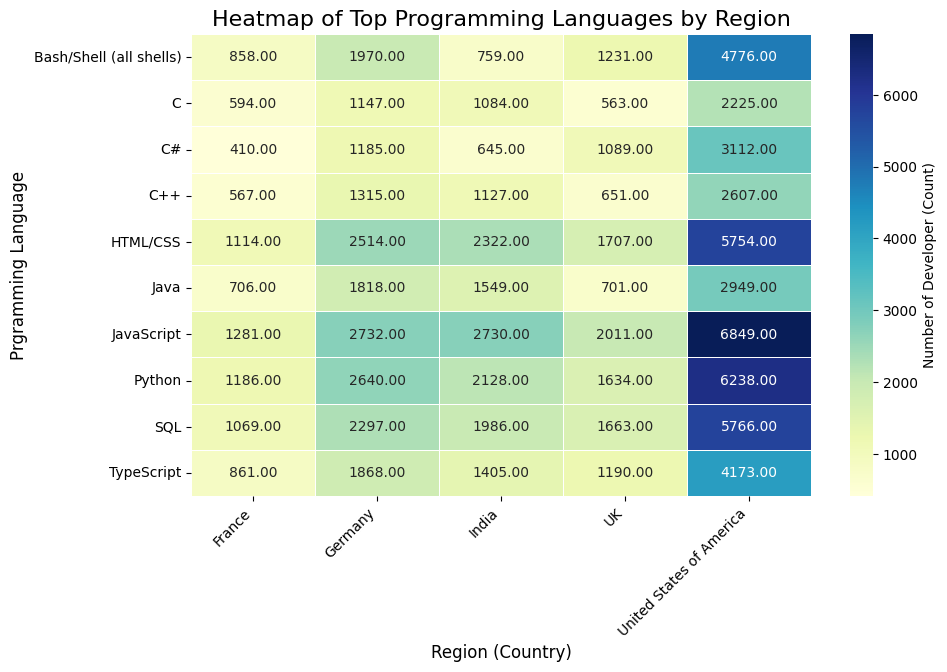

In [65]:
plt.figure(figsize = (10,6)) 
sns.heatmap(pivot_tab, 
            annot= True, 
            fmt = '.2f',
            cmap = 'YlGnBu', 
            linewidths = .5,
            cbar_kws ={'label' : 'Number of Developer (Count)'})
plt.title('Heatmap of Top Programming Languages by Region', fontsize  = 16) 
plt.xlabel('Region (Country)', fontsize =12) 
plt.ylabel('Prgramming Language', fontsize =12)
plt.xticks(rotation = 45, ha = 'right') 
plt.yticks(rotation =0)
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [66]:
## Write your code here  
df[['YearsCodePro', 'JobSatPoints_1']].head(10)

,YearsCodePro,JobSatPoints_1
0,NaN,NaN
1,17.0,0.0
2,27.0,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,7.0,NaN
7,NaN,NaN
8,NaN,NaN
9,11.0,NaN


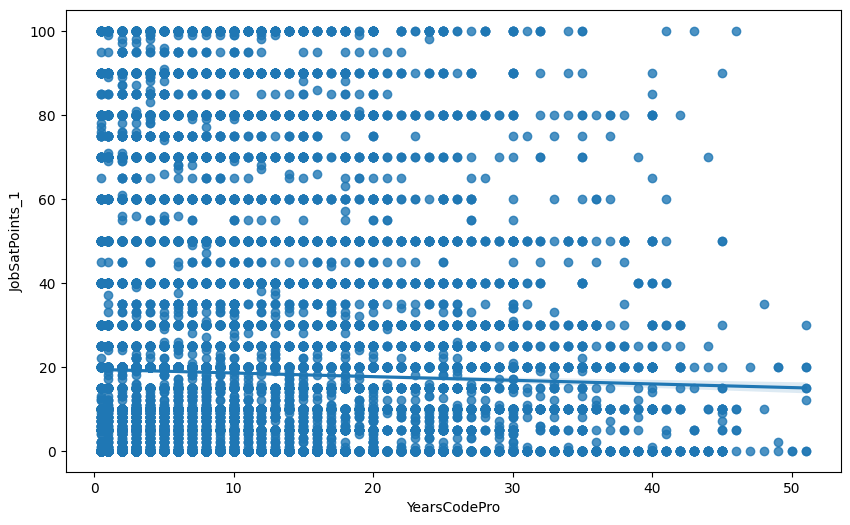

In [68]:
plt.figure(figsize = (10,6)) 
sns.regplot(data = df, x ='YearsCodePro', y= 'JobSatPoints_1') 
plt.show()

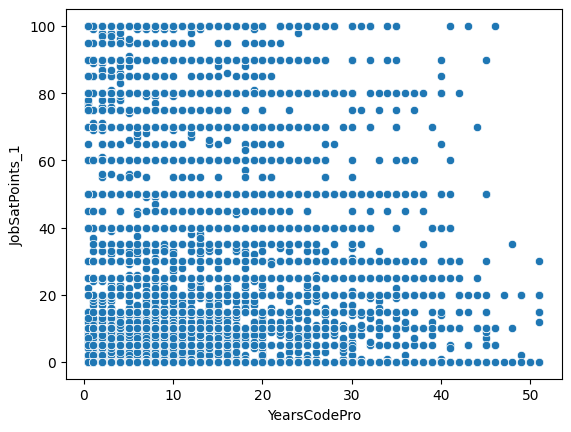

In [69]:
sns.scatterplot(data=df, x = 'YearsCodePro', y= 'JobSatPoints_1') 
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [70]:
## Write your code here
cross_tab_ed = pd.crosstab(index = df['Employment'], columns = df['EdLevel'], margins = True)
cross_tab_ed

EdLevel,"Associate degree (A.A., A.S., etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Primary/elementary school,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Some college/university study without earning a degree,Something else,All
Employment,,,,,,,,,
"Employed, full-time",1059,16806,11011,160,2073,1460,3579,377,36525
"Employed, full-time;Employed, part-time",9,90,61,1,8,9,15,3,196
"Employed, full-time;Independent contractor, freelancer, or self-employed",104,1381,963,25,159,181,492,41,3346
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time",11,79,45,1,10,6,14,2,168
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired",0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
"Student, full-time;Student, part-time;Retired",0,0,0,1,0,1,0,0,2
"Student, part-time",12,105,26,48,5,140,75,17,428
"Student, part-time;Employed, part-time",24,184,85,4,5,100,103,14,519


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [25]:
## Write your code here
df.to_csv('

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
